# IMPORT LIBRARY

IMPORT LIBRARY

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING DATA

In [49]:
from google.colab import drive
drive.mount('/content/drive')

data_diabetes = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')
data_diabetes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
print("\nJumlah nilai 0 per kolom sebelum imputasi:")
print((data_diabetes == 0).sum())


Jumlah nilai 0 per kolom sebelum imputasi:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [51]:
columns_to_impute = ['SkinThickness', 'Insulin']

print(f"\n--- Mengisi nilai 0 dengan rata-rata untuk kolom: {columns_to_impute} ---")

for col in columns_to_impute:
    data_diabetes[col] = data_diabetes[col].replace(0, np.nan)

print("\nJumlah nilai NaN per kolom setelah mengganti 0 dengan NaN:")
print(data_diabetes.isnull().sum())

# 4. Isi NaN dengan nilai rata-rata dari masing-masing kolom
# Pastikan untuk menghitung rata-rata setelah 0 diganti dengan NaN,
# sehingga rata-rata tidak terpengaruh oleh nilai 0 tersebut.
for col in columns_to_impute:
    mean_value = data_diabetes[col].mean()
    data_diabetes[col] = data_diabetes[col].fillna(mean_value)

print("\nJumlah nilai NaN per kolom setelah imputasi (seharusnya 0 untuk kolom yang diisi):")
print(data_diabetes.isnull().sum())

print("\n5 baris pertama DataFrame setelah imputasi (untuk melihat perubahannya):")
print(data_diabetes.head())
print("\nInformasi DataFrame setelah imputasi (seharusnya tidak ada NaN di kolom yang diisi):")
data_diabetes.info()


--- Mengisi nilai 0 dengan rata-rata untuk kolom: ['SkinThickness', 'Insulin'] ---

Jumlah nilai NaN per kolom setelah mengganti 0 dengan NaN:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Jumlah nilai NaN per kolom setelah imputasi (seharusnya 0 untuk kolom yang diisi):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

5 baris pertama DataFrame setelah imputasi (untuk melihat perubahannya):
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6      148             72 

In [52]:
x = data_diabetes.drop('Outcome', axis=1)
y = data_diabetes['Outcome']

# PLOTTING

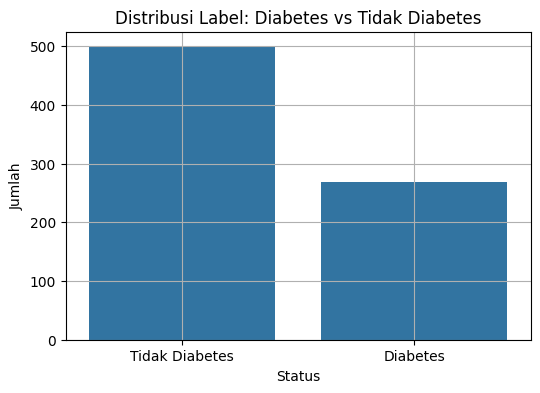

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data_diabetes)
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.title('Distribusi Label: Diabetes vs Tidak Diabetes')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

In [ ]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_diabetes.median(numeric_only=True)

,0
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,23.0000
Insulin,30.5000
BMI,32.0000
DiabetesPedigreeFunction,0.3725
Age,29.0000
Outcome,0.0000


In [ ]:
data_diabetes[['Glucose', 'BMI', 'BloodPressure', 'Age']].describe()

,Glucose,BMI,BloodPressure,Age
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,69.105469,33.240885
std,31.972618,7.884160,19.355807,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,99.000000,27.300000,62.000000,24.000000
50%,117.000000,32.000000,72.000000,29.000000
75%,140.250000,36.600000,80.000000,41.000000
max,199.000000,67.100000,122.000000,81.000000


In [ ]:
data_diabetes.groupby('Outcome')['Glucose'].mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


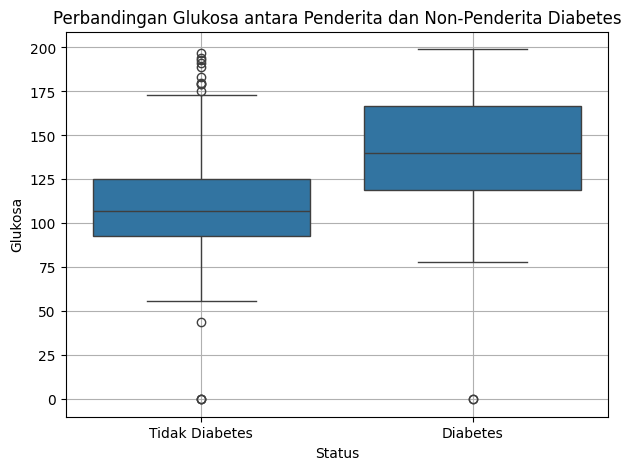

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Outcome', y='Glucose', data=data_diabetes)
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.title('Perbandingan Glukosa antara Penderita dan Non-Penderita Diabetes')
plt.xlabel('Status')
plt.ylabel('Glukosa')
plt.grid(True)
plt.show()

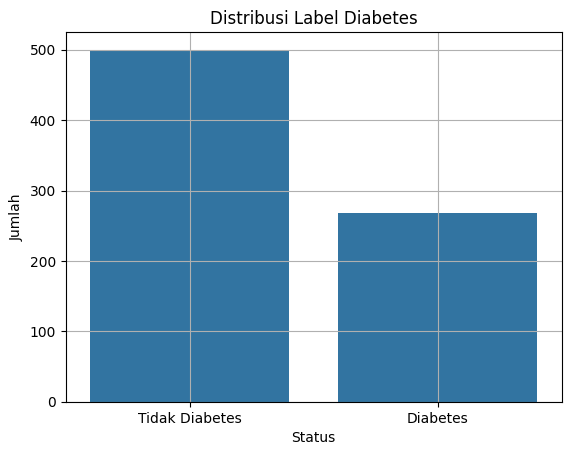

In [ ]:
sns.countplot(x='Outcome', data=data_diabetes)
plt.title('Distribusi Label Diabetes')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()

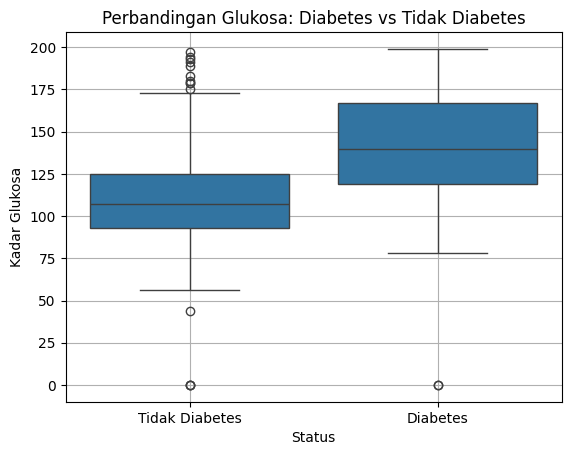

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=data_diabetes)
plt.title('Perbandingan Glukosa: Diabetes vs Tidak Diabetes')
plt.xlabel('Status')
plt.ylabel('Kadar Glukosa')
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()

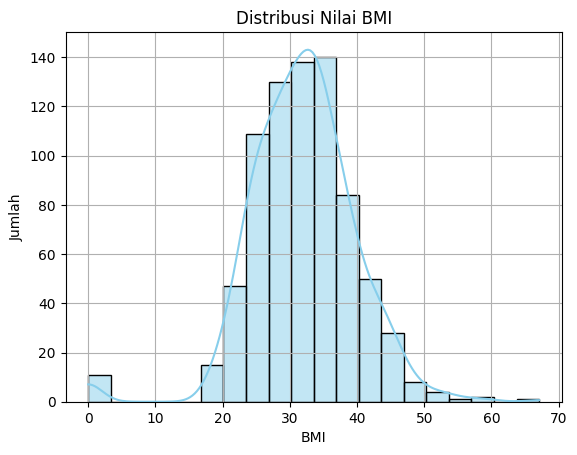

In [ ]:
sns.histplot(data_diabetes['BMI'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Nilai BMI')
plt.xlabel('BMI')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

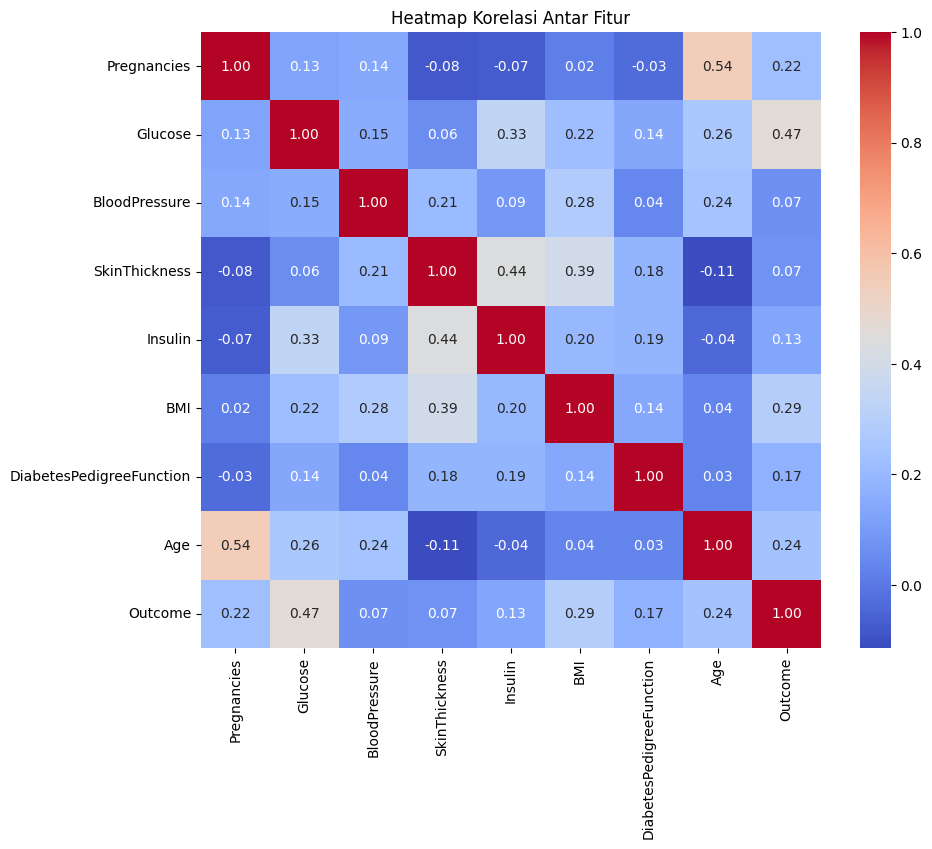

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_diabetes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# BALANCING DATA

BALANCING DATA MENGGUNAKAN SMOTE

Class distribution before resampling: Outcome
0    500
1    268
Name: count, dtype: int64


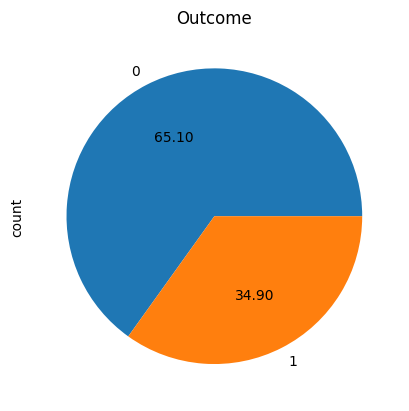

Class distribution after resampling: Outcome
1    500
0    500
Name: count, dtype: int64


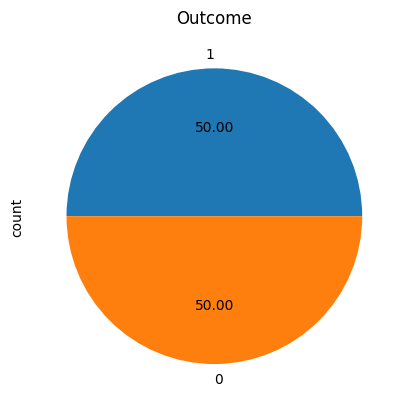

In [53]:
smote = SMOTE(sampling_strategy='all')
x_resampled, y_resampled = smote.fit_resample(x, y)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y.value_counts())
y.value_counts().plot.pie(autopct='%.2f')
plt.title('Outcome')
plt.show()

print('Class distribution after resampling:', y_resampled.value_counts())

y_resampled.value_counts().plot.pie(autopct='%.2f')
plt.title('Outcome')
plt.show()

In [54]:
#menggabungkan data x dan y yang sudah dismote/diresample ke dalam data_diabetes_resampled
data_diabetes_resampled = pd.concat([x_resampled, y_resampled], axis=1)
data_diabetes_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,155.548223,33.600000,0.627000,50,1
1,1,85,66,29.000000,155.548223,26.600000,0.351000,31,0
2,8,183,64,29.153420,155.548223,23.300000,0.672000,32,1
3,1,89,66,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137,40,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,11,137,75,27.685067,141.378784,34.639608,0.501393,48,1
996,7,184,64,29.394025,155.548223,24.811452,0.615842,31,1
997,3,169,73,20.228268,125.877334,30.198294,0.261946,30,1
998,4,130,82,29.153420,155.548223,39.071788,0.955199,36,1


# MODELING

MODELING MENGGUNAKAN RANDOM FOREST CLASSIFIER

In [55]:
#split data x dan y yang sudah dismote menjadi data testing dan data training
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [56]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, max_features = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=1,
                       n_estimators=200)

# EVALUASI

EVALUASI MODEL

In [ ]:
# Evaluasi model
y_pred_train = rand_clf.predict(x_train)
y_pred_test = rand_clf.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Akurasi Model (Train): {accuracy_train:.4f}")
print(f"Akurasi Model (Test): {accuracy_test:.4f}")

# Analisis lebih lanjut
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Akurasi Model (Train): 1.0000
Akurasi Model (Test): 0.8100
[[71 28]
 [10 91]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        99
           1       0.76      0.90      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [57]:
import pickle
from google.colab import files

# Simpan model setelah training
file_path = '/content/drive/MyDrive/ML/model.pkl'
with open("model.sav", "wb") as f:
    pickle.dump(rand_clf, f)

files.download("model.sav")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# MODEL INFERENCE

In [58]:
import numpy as np

# Load model
with open("model.sav", "rb") as f:
    model = pickle.load(f)

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Contoh input (urutan harus sesuai kolom di atas)
input_data = np.array([[6, 148, 72, 35, 155, 33.6, 0.627, 50]])  # Ganti dengan input user

input_df = pd.DataFrame(input_data, columns=feature_names)

# Inference
prediction = model.predict(input_df)
probability = model.predict_proba(input_df)

# Output hasil
if prediction[0] == 1:
    print(f"Pasien kemungkinan menderita diabetes (Probabilitas: {probability[0][1]:.2f})")
else:
    print(f"Pasien kemungkinan TIDAK menderita diabetes (Probabilitas: {probability[0][0]:.2f})")

Pasien kemungkinan menderita diabetes (Probabilitas: 0.95)
